In [5]:
import pandas as pd
import tensorflow as tf

In [6]:
import numpy as np

In [7]:
# READ DATA
from numpy import genfromtxt
my_data = genfromtxt('cryo.csv', delimiter=',')

In [74]:
column_names = ["sex","age","Time","Number_of_Warts","Type","Area","Result_of_Treatment"]

data = pd.read_csv('cryo.csv')
y = data["Result_of_Treatment"]
data = data.drop(columns=["Result_of_Treatment"])

In [76]:

# Normalized data [0,1]
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=data.columns)
df


,sex,age,Time,Number_of_Warts,Type,Area
0,0.0,0.384615,1.000000,0.363636,0.0,0.128686
1,0.0,0.269231,0.574468,0.363636,0.0,0.123324
2,0.0,0.673077,0.659574,0.000000,1.0,0.171582
3,0.0,0.326923,0.978723,0.545455,1.0,1.000000
4,0.0,1.000000,0.765957,0.000000,0.0,0.050938
5,0.0,0.500000,0.659574,0.090909,0.5,0.021448
6,0.0,0.403846,0.914894,0.090909,0.0,0.005362
7,0.0,0.846154,0.276596,0.181818,1.0,0.021448
8,0.0,0.096154,0.361702,1.000000,0.0,0.002681
9,1.0,0.365385,0.936170,0.181818,1.0,0.195710


In [156]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.10, random_state=42)

partial_X_train, X_val, partial_y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [157]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation=tf.nn.sigmoid))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [160]:
import numpy as np


train_data = X_train.values
train_targets = y_train.values
test_data = X_test
test_targets = y_test

k = 3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2


In [149]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [166]:

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['acc']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2


In [167]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

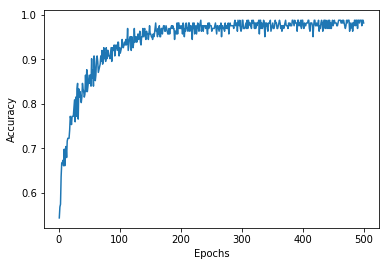

In [168]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

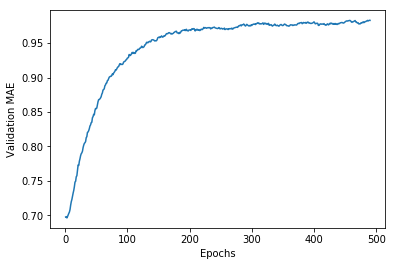

In [169]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [170]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

9/9 [==============================] - 0s 48ms/step


In [171]:
test_acc_score

0.5555555820465088

history_dict = history.history
history_dict.keys()

In [ ]:
results = model.evaluate(X_test,y_test,steps=10)

print(results)

In [ ]:
model.predict()